# Capstone Project Notebook

Author: Pamela Denisse Lopez Mata

This notebook is for the "Applied Data Science Capstone" course activities of the IBM-Data-Science-Specialization.

## Table of contents
* [1. Introduction: Business Problem](#introduction)
* [2. Data](#data)
* [3. Methodology](#methodology)
* [4. Results](#results)
* [5. Discussion](#discussion)
* [6. Conclusion](#conclusion)
* [7. References](#references)

## 1. Introduction: Business Problem  <a name="introduction"></a>

Earthquake is a term used to describe both sudden slip on a fault, and the resulting ground shaking and radiated seismic energy caused by the slip, or by volcanic or magmatic activity, or other sudden stress changes in the earth. (1) 

Earthquake hazard is anything associated with an earthquake that may affect the normal activities of people. This includes surface faulting, ground shaking, landslide, liquefaction, tectonic deformation, tsunamis, and seiches. (2)

Earthquake risk is the probable building damage, and number of people that are expected to be hurt or killed if a likely earthquake on a particular fault occurs. (3)

When you plan to invest in cities located along the Pacific Ocean, these are terms that should be seriously considered before making a decision, especially in cities with as much economic, tourist and cultural relevance as California. However, not only investors are interested in this issue, the government itself is concerned with mitigating as much as possible the greatest amount of risk under which its population is.

Considering both the government and investors and their need to have an updated knowledge of the latent risk of California, this work focuses on determining the risk under which the most important establishments are located in some of the most important areas of California.

## 2. Data  <a name="data"></a>

In order to achieve the analysis proposed, it will be necessary to consult the earthquake databases that the state institutions of the state of California have, such as the U.S. Geological Survey (USGS) portal of USGS Earthquake Hazards Program (https://earthquake.usgs.gov/data/data.php) or the Southern California Earthquake Data Center (SCEDC) (https://scedc.caltech.edu/about/index.html) for example. This information on earthquakes and risk areas could spatially locate the places of interest and analyze any would be at greater risk.

In addition, the fisrt 100 venues information will be downloaded from Foursquare, 1.5 Km arround each epycentencer.

### 2.1. Load SM2.5+ Earthquakes Past 30 Days Data
Updated every minute (4).

In [1]:
import json
import urllib.request
import pandas as pd
import requests
import numpy as np

In [2]:
with urllib.request.urlopen("https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_month.geojson") as url:
    data = json.loads(url.read().decode())
    print(data)

{'type': 'FeatureCollection', 'metadata': {'generated': 1570599602000, 'url': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_month.geojson', 'title': 'USGS Magnitude 2.5+ Earthquakes, Past Month', 'status': 200, 'api': '1.8.1', 'count': 1876}, 'features': [{'type': 'Feature', 'properties': {'mag': 3.6, 'place': '76km W of Anchor Point, Alaska', 'time': 1570595389932, 'updated': 1570596207941, 'tz': -540, 'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/ak019cyg3x93', 'detail': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/ak019cyg3x93.geojson', 'felt': None, 'cdi': None, 'mmi': None, 'alert': None, 'status': 'automatic', 'tsunami': 0, 'sig': 199, 'net': 'ak', 'code': '019cyg3x93', 'ids': ',ak019cyg3x93,', 'sources': ',ak,', 'types': ',geoserve,origin,', 'nst': None, 'dmin': None, 'rms': 0.57, 'gap': None, 'magType': 'ml', 'type': 'earthquake', 'title': 'M 3.6 - 76km W of Anchor Point, Alaska'}, 'geometry': {'type': 'Point', 'coordinates': [-153.1876

### 2.2. Select SM2.5+ Earthquakes Past 30 Days in California, US

In [3]:
keys = []
len_data = len(data['features'])
i=0
for l in range(len_data):
    if data['features'][l]['properties']['place'].find(', CA')!=-1:
        keys.append(l)
        
features_dict = {x:data['features'][x] for x in keys}
features = []
for i in features_dict.values():
    features.append (i)

data_keys = ['type', 'metadata', 'bbox']
california_data = {x:data[x] for x in data_keys}
california_data['features'] = features
print(california_data)

{'type': 'FeatureCollection', 'metadata': {'generated': 1570599602000, 'url': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_month.geojson', 'title': 'USGS Magnitude 2.5+ Earthquakes, Past Month', 'status': 200, 'api': '1.8.1', 'count': 1876}, 'bbox': [-179.7796, -65.1568, -1.5, 179.903, 85.7815, 644.67], 'features': [{'type': 'Feature', 'properties': {'mag': 2.47, 'place': '15km ENE of Ridgecrest, CA', 'time': 1570576174380, 'updated': 1570576826000, 'tz': -480, 'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/ci39120568', 'detail': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/ci39120568.geojson', 'felt': None, 'cdi': None, 'mmi': None, 'alert': None, 'status': 'automatic', 'tsunami': 0, 'sig': 94, 'net': 'ci', 'code': '39120568', 'ids': ',ci39120568,', 'sources': ',ci,', 'types': ',focal-mechanism,geoserve,nearby-cities,origin,phase-data,scitech-link,', 'nst': 37, 'dmin': 0.06576, 'rms': 0.18, 'gap': 39, 'magType': 'ml', 'type': 'earthquake', 'ti

In [4]:
Earthquakes_CA = pd.DataFrame.from_dict(features)
Earthquakes_CA = pd.concat([Earthquakes_CA.drop(['geometry'], axis=1), Earthquakes_CA['geometry'].apply(pd.Series)], axis=1)
Earthquakes_CA = pd.concat([Earthquakes_CA.drop(['properties'], axis=1), Earthquakes_CA['properties'].apply(pd.Series)], axis=1)
Earthquakes_CA[['longitude','latitude','altitude']] = pd.DataFrame(Earthquakes_CA.coordinates.values.tolist(), index= Earthquakes_CA.index)
Earthquakes_CA = Earthquakes_CA[['id','mag','place','title','longitude','latitude']]

print('{} earthquakes magnitude 2.5+ from last 30 days.'.format(Earthquakes_CA.shape[0]))
Earthquakes_CA.head()

127 earthquakes magnitude 2.5+ from last 30 days.


,id,mag,place,title,longitude,latitude
0,ci39120568,2.47,"15km ENE of Ridgecrest, CA","M 2.5 - 15km ENE of Ridgecrest, CA",-117.528500,35.679000
1,ci39120480,2.57,"20km E of Little Lake, CA","M 2.6 - 20km E of Little Lake, CA",-117.687333,35.969500
2,ci39120144,2.73,"13km ENE of Ridgecrest, CA","M 2.7 - 13km ENE of Ridgecrest, CA",-117.551333,35.676333
3,nc73288720,2.94,"16km NW of Pinnacles, CA","M 2.9 - 16km NW of Pinnacles, CA",-121.259499,36.638668
4,nc73288615,2.69,"32km SSE of Somes Bar, CA","M 2.7 - 32km SSE of Somes Bar, CA",-123.294998,41.127998


### 2.3. Load venues in California, US from Foursquare

#### Foursquare account:

In [5]:
CLIENT_ID = '32WO3S3K1YLIQGVEPNPEDW2RBZ5QIBSJYPABGKBQQOHZUNK1' # your Foursquare ID
CLIENT_SECRET = '1C4FD0HKCYENTYPHRE3EV5PCC0KACNXSCUVD00ALFUTPBC2T' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [6]:
# Top 100 venues within a radius of 500 meters.
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 1500 # define radius

In [7]:
def getNearbyVenues(ID, mag, place, names, latitudes, longitudes, radius,):
    
    venues_list=[]
    for ID, mag, place, name, lat, lng in zip(ID, mag, place, names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            ID,
            mag,
            place,
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Earthquake',
                             'Earthquake Magnitude',
                             'Earthquake Place',
                             'Earthquake Title', 
                             'Earthquake Latitude', 
                             'Earthquake Longitude', 
                             'Venue', 
                             'Venue Latitude', 
                             'Venue Longitude', 
                             'Venue Category']
    
    return(nearby_venues)

In [8]:
CA_venues = getNearbyVenues(ID=Earthquakes_CA['id'],
                            mag=Earthquakes_CA['mag'],
                            place=Earthquakes_CA['place'],
                            names=Earthquakes_CA['title'],
                            latitudes=Earthquakes_CA['latitude'],
                            longitudes=Earthquakes_CA['longitude'],
                            radius=radius
                            )

M 2.5 - 15km ENE of Ridgecrest, CA
M 2.6 - 20km E of Little Lake, CA
M 2.7 - 13km ENE of Ridgecrest, CA
M 2.9 - 16km NW of Pinnacles, CA
M 2.7 - 32km SSE of Somes Bar, CA
M 2.6 - 22km ESE of Little Lake, CA
M 2.5 - 36km NW of Baker, CA
M 2.9 - 28km W of Petrolia, CA
M 3.1 - 25km W of Petrolia, CA
M 2.8 - 18km ESE of Ocotillo Wells, CA
M 2.5 - 15km ENE of Ridgecrest, CA
M 2.5 - 3km E of Mammoth Lakes, CA
M 3.5 - 5km WSW of Colma, CA
M 2.6 - 19km W of Searles Valley, CA
M 2.8 - 12km SW of Searles Valley, CA
M 2.5 - 2km E of Mammoth Lakes, CA
M 2.6 - 3km SW of San Juan Bautista, CA
M 2.6 - 7km WNW of Biola, CA
M 2.6 - 6km NW of Biola, CA
M 2.5 - 4km WNW of Cobb, CA
M 2.5 - 3km E of Mammoth Lakes, CA
M 2.9 - 10km NNE of Phelan, CA
M 2.6 - 12km NE of Coso Junction, CA
M 2.9 - 20km ESE of Kettleman City, CA
M 2.5 - 3km WSW of San Juan Bautista, CA
M 2.8 - 8km NE of Aguanga, CA
M 3.6 - 16km NNE of Ridgecrest, CA
M 2.5 - 11km SW of Morongo Valley, CA
M 2.7 - 14km SSW of Searles Valley, CA
M 2.

In [9]:
print('{} venues were returned by Foursquare.'.format(CA_venues.shape[0]))
CA_venues.head()

234 venues were returned by Foursquare.


,Earthquake,Earthquake Magnitude,Earthquake Place,Earthquake Title,Earthquake Latitude,Earthquake Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,nc73287360,2.54,"3km E of Mammoth Lakes, CA","M 2.5 - 3km E of Mammoth Lakes, CA",37.640999,-118.950333,SKADI,37.637522,-118.965933,Modern European Restaurant
1,nc73287360,2.54,"3km E of Mammoth Lakes, CA","M 2.5 - 3km E of Mammoth Lakes, CA",37.640999,-118.950333,Roberto's Cafe,37.641956,-118.966163,Mexican Restaurant
2,nc73287360,2.54,"3km E of Mammoth Lakes, CA","M 2.5 - 3km E of Mammoth Lakes, CA",37.640999,-118.950333,Mammoth Rock-N-Bowl,37.636578,-118.964965,Bowling Alley
3,nc73287360,2.54,"3km E of Mammoth Lakes, CA","M 2.5 - 3km E of Mammoth Lakes, CA",37.640999,-118.950333,Mammoth Tavern,37.637532,-118.965910,Pub
4,nc73287360,2.54,"3km E of Mammoth Lakes, CA","M 2.5 - 3km E of Mammoth Lakes, CA",37.640999,-118.950333,Mimi's Cookie Bar,37.637504,-118.966654,Bakery


## 3. Methodology  <a name="methodology"></a>

### 3.1. Data Visualization

In [10]:
import folium
from pandas.io.json import json_normalize

#### 3.1.1. Venues data map

In [11]:
california_latitude = 36.778259 #34.052235 
california_longitude = -119.417931 #-118.24368
california_map = folium.Map(location=[california_latitude, california_longitude], zoom_start=6)


def plotpoint(df):
    folium.CircleMarker(location=[df['Venue Latitude'], df['Venue Longitude']],
                        radius=3,
                        fill=True,
                        fill_opacity=1).add_to(california_map)
CA_venues.apply(plotpoint, axis=1)

california_map

#### 3.1.2. Earthquakes data map

In [12]:
folium.GeoJson(
    california_data,
    name='geojson',
    tooltip = folium.features.GeoJsonTooltip(fields=['mag','place'], localize=True)
    ).add_to(california_map)

california_map

### 3.2. California's venue data preprocessing

Manipulate data in order to know by how many earthquakes epycenters a venue is surrounded on 1.5 Km.

In [13]:
CA_venues['Earthquake Magnitude'] = CA_venues['Earthquake Magnitude'].apply(str)

CA_VenueEarthquake = pd.get_dummies(CA_venues[['Earthquake Magnitude']], prefix="", prefix_sep="")
CA_VenueEarthquake['Venue'] = CA_venues['Venue'] 
fixed_columns = [CA_VenueEarthquake.columns[-1]] + list(CA_VenueEarthquake.columns[:-1])
CA_VenueEarthquake = CA_VenueEarthquake[fixed_columns]

CA_VenueEarthquake.head()

,Venue,2.45,2.48,2.5,2.54,2.56,2.57,2.63,2.64,2.73,...,2.78,2.84,2.85,2.87,2.9,2.91,2.92,2.97,3.14,3.96
0,SKADI,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Roberto's Cafe,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Mammoth Rock-N-Bowl,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Mammoth Tavern,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Mimi's Cookie Bar,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
CA_grouped = CA_VenueEarthquake.groupby('Venue').sum().reset_index()
CA_grouped.head()

,Venue,2.45,2.48,2.5,2.54,2.56,2.57,2.63,2.64,2.73,...,2.78,2.84,2.85,2.87,2.9,2.91,2.92,2.97,3.14,3.96
0,1 Solar Source,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,7-Eleven,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,9110 Nail Salon,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,Amador Lakes Gym,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,Amador Rancho Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


Unil now, it is possible to identify how many of each earthquake magnitudes have had effect on each venue. So, the next step is to know the top 5 for each one.

In [15]:
# Function to sort the earthquakes magnitudes in descending order.
def return_most_common_mag(row, num_top_mag):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_mag]

In [16]:
num_top_mag = 5
indicators = ['st', 'nd', 'rd']
columns = ['Venue']

for ind in np.arange(num_top_mag):
    try:
        columns.append('{}{} Most Common Magnitude'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Magnitude'.format(ind+1))

CA_VenueEarthquake_sorted = pd.DataFrame(columns=columns)
CA_VenueEarthquake_sorted['Venue'] = CA_grouped['Venue']

for ind in np.arange(CA_grouped.shape[0]):
    CA_VenueEarthquake_sorted.iloc[ind, 1:] = return_most_common_mag(CA_grouped.iloc[ind, :], num_top_mag)

CA_VenueEarthquake_sorted.head()

,Venue,1st Most Common Magnitude,2nd Most Common Magnitude,3rd Most Common Magnitude,4th Most Common Magnitude,5th Most Common Magnitude
0,1 Solar Source,3.96,2.74,2.48,2.5,2.54
1,7-Eleven,2.91,3.96,2.74,2.48,2.5
2,9110 Nail Salon,2.74,2.91,3.96,2.48,2.5
3,Amador Lakes Gym,2.91,3.96,2.74,2.48,2.5
4,Amador Rancho Park,2.74,2.91,3.96,2.48,2.5


### 3.3. K-means clustering

In [17]:
from sklearn.cluster import KMeans

In [18]:
kclusters = 3
CA_grouped_clustering = CA_grouped.drop('Venue', 1)

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(CA_grouped_clustering)
kmeans.labels_[0:10]

array([0, 0, 0, 0, 0, 0, 0, 2, 2, 2])

In [19]:
CA_VenueEarthquake_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [20]:
CA_merged = CA_venues
CA_merged = CA_merged.join(CA_VenueEarthquake_sorted.set_index('Venue'), on='Venue')
CA_merged.head()

,Earthquake,Earthquake Magnitude,Earthquake Place,Earthquake Title,Earthquake Latitude,Earthquake Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Cluster Labels,1st Most Common Magnitude,2nd Most Common Magnitude,3rd Most Common Magnitude,4th Most Common Magnitude,5th Most Common Magnitude
0,nc73287360,2.54,"3km E of Mammoth Lakes, CA","M 2.5 - 3km E of Mammoth Lakes, CA",37.640999,-118.950333,SKADI,37.637522,-118.965933,Modern European Restaurant,2,2.48,2.54,3.96,2.74,2.5
1,nc73287360,2.54,"3km E of Mammoth Lakes, CA","M 2.5 - 3km E of Mammoth Lakes, CA",37.640999,-118.950333,Roberto's Cafe,37.641956,-118.966163,Mexican Restaurant,2,2.48,2.54,3.96,2.74,2.5
2,nc73287360,2.54,"3km E of Mammoth Lakes, CA","M 2.5 - 3km E of Mammoth Lakes, CA",37.640999,-118.950333,Mammoth Rock-N-Bowl,37.636578,-118.964965,Bowling Alley,2,2.48,2.54,3.96,2.74,2.5
3,nc73287360,2.54,"3km E of Mammoth Lakes, CA","M 2.5 - 3km E of Mammoth Lakes, CA",37.640999,-118.950333,Mammoth Tavern,37.637532,-118.965910,Pub,2,2.48,2.54,3.96,2.74,2.5
4,nc73287360,2.54,"3km E of Mammoth Lakes, CA","M 2.5 - 3km E of Mammoth Lakes, CA",37.640999,-118.950333,Mimi's Cookie Bar,37.637504,-118.966654,Bakery,2,2.48,2.54,3.96,2.74,2.5


## 4. Results <a name="results"></a>

In [21]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [23]:
map_clusters = folium.Map(location=[california_latitude, california_longitude], zoom_start=6)

# Cluster color schema
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.flag(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

for lati, long, epi in zip(CA_merged['Earthquake Latitude'], CA_merged['Earthquake Longitude'], CA_merged['Earthquake Title']):
    label = folium.Popup(str(epi) + ' Cluster ', parse_html=True)
    folium.CircleMarker(
        [lati, long],
        radius=8,
        popup=label,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7).add_to(map_clusters)

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(CA_merged['Venue Latitude'], CA_merged['Venue Longitude'], CA_merged['Venue'], CA_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
          
map_clusters

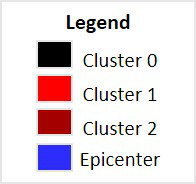

In [25]:
from PIL import Image
jpgfile = Image.open("Legend.jpg")
jpgfile

In [26]:
CA_merged.loc[CA_merged['Cluster Labels'] == 0, CA_merged.columns[[1] + list(range(5, CA_merged.shape[1]))]]

,Earthquake Magnitude,Earthquake Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Cluster Labels,1st Most Common Magnitude,2nd Most Common Magnitude,3rd Most Common Magnitude,4th Most Common Magnitude,5th Most Common Magnitude
71,2.64,-120.066330,Sun-Maid Growers Of California,36.836937,-120.067787,Food,0,2.64,3.96,2.74,2.48,2.5
76,2.92,-117.525000,Calypso 10,34.506905,-117.513876,Boat or Ferry,0,2.92,3.96,2.74,2.48,2.5
77,2.91,-121.927170,T4 Tea For You,37.730203,-121.929927,Bubble Tea Shop,0,2.74,2.91,3.96,2.48,2.5
78,2.91,-121.927170,Walmart Neighborhood Market,37.729481,-121.929481,Grocery Store,0,2.74,2.91,3.96,2.48,2.5
79,2.91,-121.927170,Rancho San Ramon Park,37.748113,-121.920076,Park,0,2.74,2.91,3.96,2.48,2.5
80,2.91,-121.927170,Splendor Medical Spa,37.731431,-121.926597,Spa,0,2.74,2.91,3.96,2.48,2.5
82,2.91,-121.927170,7-Eleven,37.724801,-121.934445,Convenience Store,0,2.91,3.96,2.74,2.48,2.5
83,2.91,-121.927170,Pizza Hut,37.728460,-121.930878,Pizza Place,0,2.74,2.91,3.96,2.48,2.5
84,2.91,-121.927170,Mexxi's Taqueria,37.728992,-121.930306,Mexican Restaurant,0,2.74,2.91,3.96,2.48,2.5
85,2.91,-121.927170,CVS pharmacy,37.728882,-121.930795,Pharmacy,0,2.45,2.74,2.91,2.48,2.5


In [27]:
CA_merged.loc[CA_merged['Cluster Labels'] == 1, CA_merged.columns[[1] + list(range(5, CA_merged.shape[1]))]]

,Earthquake Magnitude,Earthquake Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Cluster Labels,1st Most Common Magnitude,2nd Most Common Magnitude,3rd Most Common Magnitude,4th Most Common Magnitude,5th Most Common Magnitude
18,2.54,-118.950333,The Volcom Brothers Skatepark,37.640395,-118.948878,Skate Park,1,2.48,2.57,2.75,2.63,2.97
24,2.54,-118.950333,Mammoth Creek Trail,37.635801,-118.958439,Trail,1,2.48,2.73,2.97,2.5,2.9
57,2.48,-118.951668,The Volcom Brothers Skatepark,37.640395,-118.948878,Skate Park,1,2.48,2.57,2.75,2.63,2.97
60,2.48,-118.951668,Mammoth Creek Trail,37.635801,-118.958439,Trail,1,2.48,2.73,2.97,2.5,2.9
72,2.48,-118.945335,Sherwin Creek Campground,37.630026,-118.936315,Campground,1,2.75,2.63,2.97,2.48,2.5
73,2.48,-118.945335,The Volcom Brothers Skatepark,37.640395,-118.948878,Skate Park,1,2.48,2.57,2.75,2.63,2.97
75,2.48,-118.945335,Mammoth Creek Trail,37.635801,-118.958439,Trail,1,2.48,2.73,2.97,2.5,2.9
143,2.97,-118.948000,Sherwin Creek Campground,37.630026,-118.936315,Campground,1,2.75,2.63,2.97,2.48,2.5
144,2.97,-118.948000,The Volcom Brothers Skatepark,37.640395,-118.948878,Skate Park,1,2.48,2.57,2.75,2.63,2.97
146,2.97,-118.948000,Mammoth Creek Trail,37.635801,-118.958439,Trail,1,2.48,2.73,2.97,2.5,2.9


In [28]:
CA_merged.loc[CA_merged['Cluster Labels'] == 2, CA_merged.columns[[1] + list(range(5, CA_merged.shape[1]))]]

,Earthquake Magnitude,Earthquake Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Cluster Labels,1st Most Common Magnitude,2nd Most Common Magnitude,3rd Most Common Magnitude,4th Most Common Magnitude,5th Most Common Magnitude
0,2.54,-118.950333,SKADI,37.637522,-118.965933,Modern European Restaurant,2,2.48,2.54,3.96,2.74,2.5
1,2.54,-118.950333,Roberto's Cafe,37.641956,-118.966163,Mexican Restaurant,2,2.48,2.54,3.96,2.74,2.5
2,2.54,-118.950333,Mammoth Rock-N-Bowl,37.636578,-118.964965,Bowling Alley,2,2.48,2.54,3.96,2.74,2.5
3,2.54,-118.950333,Mammoth Tavern,37.637532,-118.965910,Pub,2,2.48,2.54,3.96,2.74,2.5
4,2.54,-118.950333,Mimi's Cookie Bar,37.637504,-118.966654,Bakery,2,2.48,2.54,3.96,2.74,2.5
5,2.54,-118.950333,Starbucks,37.646274,-118.964300,Coffee Shop,2,2.48,2.54,2.45,2.74,2.91
6,2.54,-118.950333,Jimmy's Taverna,37.642396,-118.966361,Greek Restaurant,2,2.48,2.54,3.96,2.74,2.5
7,2.54,-118.950333,Sierra Nevada Resort,37.643598,-118.966928,Motel,2,2.48,2.54,3.96,2.74,2.5
8,2.54,-118.950333,Booky Joint,37.639089,-118.964713,Bookstore,2,2.97,2.48,2.54,3.96,2.74
9,2.54,-118.950333,CJ's Grill,37.641178,-118.966129,New American Restaurant,2,2.48,2.54,3.96,2.74,2.5


## 5. Discussion <a name="discussion"></a>

During the execution of this code there were many connection issues, so from the 50 Km considered in the beginning, the venues consulting was restricted to only 1.5 KM, that's why at first sight, the venues analized are almost over the epicenters points.

Zooming into then, it's clearly that the black points are closests to the epicenters (in most cases to just one). Only to the East it can be seen more diversity of clusters (black, dark red and light red).

## 6. Conclusion <a name="conclussion"></a>

The k-means clustering identified on the map that the venues nearest to the epicenters are inthe Cluster 0, while the farest are on Cluster 2.

It is propoused that for better results, the venues consulting should include a greater radius value and it can also be included other earthquake magnitudes like 3+ or 5+, to have a better understanding of Earthquake Hazards.

## 7. References <a name="references"></a>

1. https://earthquake.usgs.gov/learn/glossary/?term=earthquake
2. https://earthquake.usgs.gov/learn/glossary/?term=earthquake%20hazard
3. https://earthquake.usgs.gov/learn/glossary/?term=earthquake%20risk
4. https://earthquake.usgs.gov/earthquakes/feed/v1.0/geojson.php